# More Explorations with MoMA Scrape

![image](img/gallery.webp)

This notebook further explores web data scraped from the MoMA collection.

The [previous notebook](https://github.com/tnakatani/python2_ccac/blob/master/wk_8/moma_scrape/moma_scrape.ipynb) explored scraped data of specific artists.  This time, the script was revised to randomly sample artworks from the collection in order to explore trends in the larger collection.

## Step 1: Data Collection 

The [moma_scrape.py](moma_scrape.py) script created an artwork dataset with the following steps:
1. NumPy's [`randint`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html?highlight=randint#numpy.random.randint) method creates a list of random integers.
2. The `ArtworkSoup` class contains a method `scrape`, which takes the integers as a parameter.  The class subsequently builds a URL with the integer and makes a HTTP request.  Both successful and unsuccessful HTTP calls are logged in a separate `scrape.log` file.
3. If the HTTP request is successful, the class instantiates a `BeautifulSoup` object, extracts relevant artwork data from the HTML and builds a data structure from it.
4. Once all HTTP calls are made, the resulting data structure is dumped to a CSV file.

__One flaw in the method__: Each integer in the 300K list of random integer does not necessarily guarantee a a valid request.  It was not clear to me how the MoMA site assigns these artwork URL IDs, so I attempted to throw a large number of a randomized sample and see how many valid requests I can receive.  Using the scraping logs, I calculated the rate of 404 errors:

```python
with open('scrape.log', 'r') as f:
    count = 0
    count_404 = 0
    for line in f:
        count += 1
        if 'INFO:root:404' in line:
            count_404 += 1
    print(f'Total HTTP requests resulting in 404 response: {count_404}')
    print(f'Total HTTP requests: {count}')    
    print(f'Ratio of 404 response versus 200: {count_404/count*100:.2f}%')

# Total requests resulting in 404: 17567
# Total HTTP requests: 30000
# Ratio of 404 response versus 200: 58.56%
```

Thus, more than half of the 300K requests resulted in a 404 error!

## Step 2: Data Exploration

Now that we have the scraped data, we can explore it as a dataframe.

In [367]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [386]:
# Import the CSV into a dataframe
df = pd.read_csv('data/artwork_data.csv', index_col=0)

# Always show all of the columns
pd.set_option('display.max_columns', None)

# View a sample of the data
df.sample(10).dropna(how='all', axis=1)

,id,artist,title,date,manufacturer,medium,dimensions,credit,object number,department,author,publisher,printer,edition,copyright,illustrated book,periodical
4429,23591,Salvador Dalí,Plate (facing page 46) fromLes Chants de Maldoror,1934,NaN,one from an illustrated book with forty-two ph...,"plate: 8 7/8 x 6 3/4"" (22.5 x 17.1cm); page: 1...",the louis e. stern collection,771.1964.10,drawings and prints,comte de lautréamont,"editions albert skira, paris","lacourière, paris",200 announced; 100 printed,"© 2020 salvador dalí, gala-salvador dalí found...",les chants de maldoror,NaN
508,12845,Pablo Picasso,Painter and Model with Long Hair(Peintre et mo...,"1964, published 1966",NaN,aquatint from an illustrated book with ten aqu...,"plate: 15 1/16 x 10 7/8"" (38.3 x 27.6 cm); pag...",abby aldrich rockefeller fund,179.1985.2,drawings and prints,pierre reverdy,"louis broder, paris","crommelynck, paris",220,© 2020 estate of pablo picasso / artists right...,sable mouvant,NaN
8042,7815,Herbert Matter,"One of Them Had Polio, Skilled Teamwork Brough...",1949,NaN,offset lithograph,"45 11/16 x 28 7/8"" (116 x 73.3 cm)",gift of the national foundation for infantile ...,634.1981,architecture and design,NaN,NaN,NaN,NaN,© 2020 alexander matter,NaN,NaN
11992,2529,Frank O. Gehry,Bubbles Chaise Longue,1987,"new city editions, venice, ca",corrugated cardboard with fire-retardant coating,"27 3/4 x 29 x 76 3/8"" (70.5 x 73.7 x 194 cm)",kenneth walker fund,141.1988,architecture and design,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6142,15167,Kurt Schwitters,"Die Kathedrale(Die Silbergäule, vol.41⁄42)",1920,NaN,illustrated book with eight lithographs (one w...,"page (each): 8 3/4 × 5 9/16"" (22.3 × 14.2 cm)","gift of edgar kaufmann, jr.",309.1952.1-8,drawings and prints,NaN,"paul steegemann verlag, hannover","edler & krische, hannover / berlin","c. 3,000","© 2020 artists rights society (ars), new york ...",NaN,NaN
6476,15897,Ernst Ludwig Kirchner,In the Barracks Yard (Auf dem Kasernenhof)(pla...,1916,NaN,lithograph,"composition (irreg.): 10 3/4 x 8 7/16"" (27.3 x...",gift of mrs. bertha m. slattery,330.1952.58,drawings and prints,NaN,"paul cassirer, berlin","m.w. lassally, berlin","periodical: popular edition (""volksausgabe a"")...",NaN,NaN,"der bildermann, vol. 1, nos. 1-18"
1408,7864,Christa Ehrlich,Oostenrijksche Schilderijen en Kunstnijverheid...,1927,NaN,linocut,"14 7/16 x 14 3/4"" (36.8 x 37.5 cm)","gift of mrs. alfred h. barr, jr.",657.1981,architecture and design,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6221,29460,Pablo Picasso,Variant ofBather(18th supplementary plate) fro...,1942,NaN,engraving over line block reproduction after w...,"composition (irreg.): 5 9/16 x 4 7/16"" (14.2 x...",the louis e. stern collection,977.1964.22,drawings and prints,NaN,NaN,NaN,NaN,© 2020 estate of pablo picasso / artists right...,NaN,NaN
6827,8921,Shichiro Imatake,Completion of Great Feat – Japan’s First Aroun...,1939,NaN,lithograph,"42 1/2 x 28 7/8"" (107.9 x 73.3 cm)",gift of the designer,1597.2000,architecture and design,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10789,7700,Willem Jacob Henri Berend Sandberg,"13 Beeldhouwers uit Parijs, Stedelijk Museum A...",1949,NaN,lithograph,"28 x 39 1/4"" (71.1 x 99.7cm)",gift of the artist,602.1951,architecture and design,NaN,NaN,stadsdrukkerij van amsterdam,NaN,NaN,NaN,NaN


While scraping the data, I noticed that the artworks had a wide range in the amount of metadata - ranging from common keys (e.g. "artist", "title") to less common ("producer", "delineator").

In [369]:
# Inspect all the features of an artwork from the 
df.keys()

Index(['id', 'artist', 'title', 'date', 'manufacturer', 'medium', 'dimensions',
       'credit', 'object number', 'department', 'author', 'publisher',
       'printer', 'edition', 'copyright', 'illustrated book', 'portfolio',
       'collaborating artist', 'model maker', 'state/variant', 'impresssion',
       'delineator', 'associated work', 'type', 'periodical',
       'architectural firm', 'fabricator', 'producer', 'design firm',
       'designer', 'editor'],
      dtype='object')

I also forgot to add a URL for each of the artworks.  Since we have the artwork ID, we can concatenate that with the URL template

In [370]:
# Create a column of URLs from artwork IDs
url = f'https://www.moma.org/collection/works/'
df['url'] = df['id'].apply(lambda x: url + str(x))
df['url'].head()

0     https://www.moma.org/collection/works/1166
1     https://www.moma.org/collection/works/6060
2     https://www.moma.org/collection/works/4242
3    https://www.moma.org/collection/works/27282
4     https://www.moma.org/collection/works/7248
Name: url, dtype: object

### Sorting Values by Frequency
A typical way to inspect categorical data like this is to calculate the relative occurrence of unique values.  This will answer questions like, "What artist do we most frequently see in this dataset?" and more.

Using `value_counts()` and `pd.concat()`, we can view both the raw count as well as the relative frequency of each unique value.

In [371]:
# Clean up the state/variant column as it causes the loop to break because of its slash
df = df.rename(columns={'state/variant':'state_variant'})

In [372]:
# Print value counts for each column, then save each aggregation as a CSV file.
for k in df.keys()[1:]:
    # Assign both raw counts and relative frequencies to variables
    count = df[k].value_counts(dropna=True)
    freq = df[k].value_counts(normalize=True, dropna=True)
    
    # Concatenate the two series into a dataframe
    values_combined = pd.concat([count, freq], keys=['count','frequency'], axis=1)
    
    # Save each dataframe as its own CSV file
    values_combined.reset_index() \
                   .rename(columns={'index': k}) \
                   .to_csv(f'data/{k}.csv')
    
    # Print results here
    banner = f'{k.upper()} - Total Unique Values: {len(count)}'
    print(banner)
    print(values_combined.head(10), '\n')

ARTIST - Total Unique Values: 2038
                          count  frequency
Pablo Picasso               675   0.054291
Thomas Bewick               311   0.025014
Joan Miró                   291   0.023405
Pierre Bonnard              210   0.016891
Sol LeWitt                  200   0.016086
Unknown Artist              164   0.013191
E. McKnight Kauffer         146   0.011743
Fernand Léger               120   0.009652
Henri Matisse               120   0.009652
Ludwig Mies van der Rohe    118   0.009491 

TITLE - Total Unique Values: 7094
                                                    count  frequency
Vase                                                   92   0.007400
Bowl                                                   77   0.006193
Untitled fromFound Masks 1975–1978                     37   0.002976
Fabric Sample                                          29   0.002333
Untitled fromTwenty-Four Personal Attitudes Rel...     28   0.002252
The Manhattan Transcripts Project, New Yor

PRODUCER - Total Unique Values: 1
                                               count  frequency
royal society for the prevention of accidents      5        1.0 

DESIGN FIRM - Total Unique Values: 3
                                       count  frequency
ergonomi design gruppen (now veryday)      9   0.818182
max dalang a.g., zürich                    1   0.090909
moggridge associates                       1   0.090909 

DESIGNER - Total Unique Values: 6
                           count  frequency
ian tyson, elizabeth kner      5   0.416667
sugiura kohei                  2   0.166667
robert defrin                  2   0.166667
david eisen                    1   0.083333
masaomi unagami                1   0.083333
graeme murray                  1   0.083333 

EDITOR - Total Unique Values: 2
                    count  frequency
max schulz, berlin      1        0.5
františek kalivoda      1        0.5 

URL - Total Unique Values: 7865
                                             count  

Some of the more interesting data points from the cursory view of the data:
1. __Pablo Picasso's__ works were the most represented, with a relative frequency of ~5%.
2. The most common artwork title is __"Vase"__, but the frequency distribution has quite a long tail.
3. The most common manufacturer is __Braun AG__ [wiki](https://en.wikipedia.org/wiki/Braun_(company)).  [Here](https://www.moma.org/collection/works/3391) is an example of a Braun product they have in the collection.
4. The most common medium is a __lithograph__, and its most common printer is [__Mourlot__](https://en.wikipedia.org/wiki/Mourlot_Studios), a commercial print shop founded in 1852 by the Mourlot family and located in Paris, France.

### Grouping Dimensions for New Perspectives

There are some data points that are easily observed by looking at value counts.  We can dive a bit deeper into the data by grouping columns together.

First off, we will be querying various keywords in each column, so let's make a simple helper function so we can type less repetitive commands:

In [373]:
def query_df(column, keyword):
    """Fuzzy match a dataframe column by a keyword
    Return a clean dataframe by dropping columns with all NaNs.
    """
    return df.loc[df[column].str.lower() \
                            .str.contains(keyword, na=False)] \
                            .dropna(how='all', axis=1)

Using this function we can query data we saw in the value counts to the full artwork data.


#### Exploring Artist Works
For instance, let's take a look at all the artwork whose manufacturer is Braun:

In [384]:
# Query artwork manufactured by Braun
query_df('manufacturer', 'braun').head()

,id,artist,title,date,manufacturer,medium,dimensions,credit,object number,department,url
87,1387,Reinhold Weiss,Multipurpose Kitchen Machine,1957,"braun ag, frankfurt, germany, est. 1921",enameled metal casing and plastic,".a: 3 5/8 x 7 3/4 x 4"" (9.2 x 19.7 x 10.2 cm)\...",gift of the manufacturer,sc7.1958.a-p,architecture and design,https://www.moma.org/collection/works/1387
93,4533,Reinhold Weiss,Hair Dryer (model HLD 2),1964,"braun ag, frankfurt, germany, est. 1921",plastic and metal casing,"1 7/8 x 5 1/4 x 3 3/4"" (4.8 x 13.3 x 9.5 cm)",gift of the manufacturer,905.1965,architecture and design,https://www.moma.org/collection/works/4533
163,3391,Dieter Rams,Special Battery-Powered Photo Flash,1958,"braun ag, frankfurt, germany, est. 1921",plastic housing,"8 1/4 x 8"" (21 x 20.3 cm)",gift of the manufacturer,353.1960.a-c,architecture and design,https://www.moma.org/collection/works/3391
362,4100,"Gerd Alfred Müller,Robert Oberheim",Kitchen Machine (model KM 32),1957,"braun ag, frankfurt, germany, est. 1921",plastic and steel,".a-.b (assembled): 10 1/2 x 14 1/2 x 7 1/2"" (2...",gift of the manufacturer,561.1964.a-e,architecture and design,https://www.moma.org/collection/works/4100
764,1164,Dieter Rams,PS 2 Stereo Turntable,1963,"braun ag, frankfurt, germany, est. 1921",plastic and metal housing,"3 3/16 x 11 7/8 x 8 5/8"" (8.1 x 30.2 x 21.9 cm)",gift of the manufacturer,2282.2001,architecture and design,https://www.moma.org/collection/works/1164


[Dieter Rams](https://en.wikipedia.org/wiki/Dieter_Rams) is a famous industrial designer in the modern design world known for products he designed for the Braun company.  Let's see what artwork they have by him:

In [375]:
dieter_rams = query_df('artist', 'dieter rams')
dieter_rams.head()

,id,artist,title,date,manufacturer,medium,dimensions,credit,object number,department,url
163,3391,Dieter Rams,Special Battery-Powered Photo Flash,1958,"braun ag, frankfurt, germany, est. 1921",plastic housing,"8 1/4 x 8"" (21 x 20.3 cm)",gift of the manufacturer,353.1960.a-c,architecture and design,https://www.moma.org/collection/works/3391
764,1164,Dieter Rams,PS 2 Stereo Turntable,1963,"braun ag, frankfurt, germany, est. 1921",plastic and metal housing,"3 3/16 x 11 7/8 x 8 5/8"" (8.1 x 30.2 x 21.9 cm)",gift of the manufacturer,2282.2001,architecture and design,https://www.moma.org/collection/works/1164
1424,2649,"Dieter Rams,Hans Gugelot",Radio-Phonograph (model SK4⁄10),1956,"braun ag, frankfurt, germany, est. 1921","painted metal, wood, and plastic","9 1/2 x 23 x 11 1/2"" (24.1 x 58.4 x 29.2 cm)",gift of the manufacturer,205.1958,architecture and design,https://www.moma.org/collection/works/2649
1864,4599,Dieter Rams,Table Lighter,1968,"braun ag, frankfurt, germany, est. 1921","plastic, chrome, and painted metal","3 3/8 x 2 1/8"" (8.6 x 5.4 cm)",gift of bonniers,1132.1969.1-3,architecture and design,https://www.moma.org/collection/works/4599
2275,3391,Dieter Rams,Special Battery-Powered Photo Flash,1958,"braun ag, frankfurt, germany, est. 1921",plastic housing,"8 1/4 x 8"" (21 x 20.3 cm)",gift of the manufacturer,353.1960.a-c,architecture and design,https://www.moma.org/collection/works/3391


We can group the artworks by how they was added to the collection by referring to the "credit" column:

In [376]:
dieter_rams['credit'].value_counts()

gift of the manufacturer       18
gift of bonniers                2
gift of braun north america     1
Name: credit, dtype: int64

Let's see artworks printed by the Mourlot company:

In [377]:
mourlot = query_df('printer', 'mourlot')
mourlot

,id,artist,title,date,medium,dimensions,credit,object number,department,author,publisher,printer,edition,copyright,illustrated book,type,fabricator,url
3,27282,Fernand Léger,Plate (page 26) fromCirque(Circus),1950,one from an illustrated book with eighty-three...,"composition (irreg.): 14 1/16 × 9 15/16"" (35.7...",the louis e. stern collection,890.1964.23,drawings and prints,fernand léger,"tériade, paris","mourlot, paris",300,"© 2020 artists rights society (ars), new york ...",cirque(circus),NaN,NaN,https://www.moma.org/collection/works/27282
63,29591,Pablo Picasso,In-text plate (page 101) fromLe Chant des morts,"1945–48, published 1948",lithograph from an illustrated book with 123 l...,"composition (irreg.): 15 1/8 x 12 1/8"" (38.4 x...",the louis e. stern collection,990.1964.101,drawings and prints,pierre reverdy,"tériade, paris","mourlot, paris",250,© 2020 estate of pablo picasso / artists right...,le chant des morts,NaN,NaN,https://www.moma.org/collection/works/29591
134,29597,Pablo Picasso,In-text plate (page 107) fromLe Chant des morts,"1945–48, published 1948",lithograph from an illustrated book with 123 l...,"composition (irreg.): 3 3/4 x 10 1/2"" (9.6 x 2...",the louis e. stern collection,990.1964.107,drawings and prints,pierre reverdy,"tériade, paris","mourlot, paris",250,© 2020 estate of pablo picasso / artists right...,le chant des morts,NaN,NaN,https://www.moma.org/collection/works/29597
201,29705,Pablo Picasso,In-text plate (page 94) fromLe Chant des morts,"1945–48, published 1948",lithograph from an illustrated book with 123 l...,"composition (irreg.): 14 1/2 x 15/16"" (36.9 x ...",the louis e. stern collection,990.1964.94,drawings and prints,pierre reverdy,"tériade, paris","mourlot, paris",250,© 2020 estate of pablo picasso / artists right...,le chant des morts,NaN,NaN,https://www.moma.org/collection/works/29705
238,5471,Fernand Léger,"F. Léger, Museum Morsbroich – Leverkusen",1955,photolithograph,"22 1/2 x 30 1/4"" (57.1 x 76.8 cm)",gift of mourlot,171.1955,architecture and design,NaN,NaN,"mourlot, paris",NaN,"© 2020 artists rights society (ars), new york ...",NaN,NaN,NaN,https://www.moma.org/collection/works/5471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12346,29590,Pablo Picasso,In-text plate (page 100) fromLe Chant des morts,"1945–48, published 1948",lithograph from an illustrated book with 123 l...,"composition (irreg.): 15 7/8 x 11 13/16"" (40.3...",the louis e. stern collection,990.1964.100,drawings and prints,pierre reverdy,"tériade, paris","mourlot, paris",250,© 2020 estate of pablo picasso / artists right...,le chant des morts,NaN,NaN,https://www.moma.org/collection/works/29590
12362,27302,Fernand Léger,Tailpiece (page 50) fromCirque(Circus),1950,one from an illustrated book with eighty-three...,"composition (irreg.): 2 5/16 × 9"" (5.8 × 22.9 ...",the louis e. stern collection,890.1964.41,drawings and prints,fernand léger,"tériade, paris","mourlot, paris",300,"© 2020 artists rights society (ars), new york ...",cirque(circus),NaN,NaN,https://www.moma.org/collection/works/27302
12386,29643,Pablo Picasso,In-text plate (page 38) fromLe Chant des morts,"1945–48, published 1948",lithograph from an illustrated book with 123 l...,"composition (irreg.): 15 13/16 x 4 1/16"" (40.2...",the louis e. stern collection,990.1964.38,drawings and prints,pierre reverdy,"tériade, paris","mourlot, paris",250,© 2020 estate of pablo picasso / artists right...,le chant des morts,NaN,NaN,https://www.moma.org/collection/works/29643
12418,14922,Joan Miró,Double page plate (between pages 72 and 73) fr...,1966,lithograph from an illustrated book with thirt...,"composition (irreg.): 16 1/2 × 24 9/16"" (41.9 ...",abby aldrich rockefeller fund (by exchange),298.1992.8,drawings and prints,alfred jarry,"tériade, paris","mourlot, paris",180,© 2020 successió miró / artists rights societ...,king ubu(ubu roi),NaN,NaN,https://www.moma.org/collection/works/14922


There are 425 artworks printed by the Mourlot company.  An interesting angle to look at this data is to investigate __how the artworks printed by Mourlot were acquired__ (by using the `credit` column), and __how many of each artist's work were acquired from the credited source__.

In [378]:
# Group the dataframe by donor and artist, then sort the result.
group = mourlot.groupby(['credit','artist'])['id']
group.count().reset_index().sort_values(by='id', ascending=False).head(10)

,credit,artist,id
42,the louis e. stern collection,Pablo Picasso,167
38,the louis e. stern collection,Fernand Léger,87
41,the louis e. stern collection,Joan Miró,78
7,gift of james thrall soby (by exchange),Joan Miró,13
0,abby aldrich rockefeller fund (by exchange),Joan Miró,10
4,gift of frederic tuten,Roy Lichtenstein,4
21,henry church fund,Jean (Hans) Arp,4
34,purchase,Fernand Léger,4
31,mary ellen meehan fund,Alberto Giacometti,4
26,henry church fund,Marcel Duchamp,3


Based on the query, the top three artworks printed by the Mourlot company acquired from the Lous E. Stern Collection were works by Pablo Picasso, Fernand Léger and Joan Miró.

## Step 3: Visualization

This section shows the distribution of copyright owners among the scraped artwork data.

### Cleaning the Data

Before visualization, I noticed that the copyright claims are prefixed by the year.  Since I am only interested in the group entities, I will first clean the data by removing the copyright year string.

In [379]:
# This is how the data looks like at the time of scraping
df['copyright'].dropna().head(10)

3     © 2020 artists rights society (ars), new york ...
4     © 2020 artists rights society (ars), new york ...
7     © 2020 artists rights society (ars), new york ...
9     © 2020 successió  miró / artists rights societ...
11    © 2020 sol lewitt / artists rights society (ar...
12    © 2020 artists rights society (ars), new york ...
14    © 2020 artists rights society (ars), new york ...
19                                    © 2020 reiko sudo
26    © 2020 al held foundation, inc. / licensed by ...
27    © 2020 artists rights society (ars), new york ...
Name: copyright, dtype: object

In [380]:
# Remove the copyright year from the strings
cp = df['copyright'].str.extract('(?<=© [0-9]{4} )(.*)(?=/.*)')

In [381]:
# Concatenate the raw count and the relative frequency,
# and reset the index
cp_count = cp[0].value_counts(dropna=True)
cp_freq = cp[0].value_counts(normalize=True, dropna=True)
cp_concat = pd.concat([cp_count, cp_freq], keys=['count','frequency'], axis=1) \
              .reset_index() \
              .rename(columns={'index': 'copyright'})

Now we have a workable dataframe with more meaningful value counts

In [382]:
cp_concat.head(10)

,copyright,count,frequency
0,"artists rights society (ars), new york",1907,0.482663
1,estate of pablo picasso,677,0.171349
2,successió miró / artists rights society (ars)...,291,0.073652
3,the josef and anni albers foundation,123,0.031131
4,succession h. matisse,120,0.030372
5,sol lewitt,114,0.028853
6,sol lewitt,86,0.021767
7,"salvador dalí, gala-salvador dalí foundation",50,0.012655
8,"artists rights society (ars), new york / adagp...",35,0.008859
9,jasper johns,34,0.008605


### Plotting the Data

We can now transform the dataframe into a plot using matplotlib.

Text(0.5, 0, 'Relative Frequency')

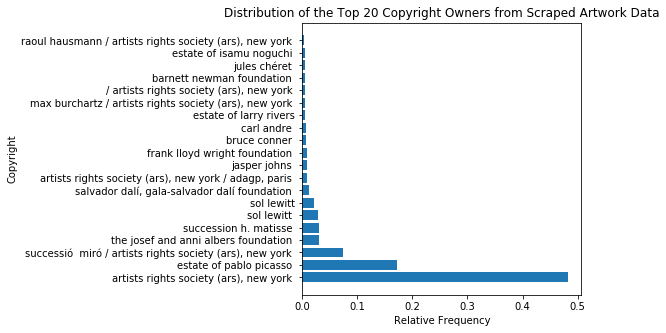

In [383]:
# Plotting all the data is too long of a tail, shorten to top 20
cp_20 = cp_concat.head(20)

fig = plt.figure(figsize=(5,5)) 
plt.barh(cp_20['copyright'], width=cp_20['frequency']);
plt.title('Distribution of the Top 20 Copyright Owners from Scraped Artwork Data')
plt.ylabel('Copyright')
plt.xlabel('Relative Frequency')

The main finding is that more than half of the artwork that I scraped is copyrighted by the [Artist Rights Society (ARS)](https://arsny.com/) of New York.

More info on the organization from their [wiki page](https://en.wikipedia.org/wiki/Artists_Rights_Society):
> Artists Rights Society (ARS) is a copyright, licensing, and monitoring organization for visual artists in the United States. Founded in 1987, ARS is a member of the International Confederation of Societies of Authors and Composers and as such represents in the United States the intellectual property rights interests of over 80,000 visual artists and estates of visual artists from around the world (painters, sculptors, photographers, architects and others).